In [53]:
import re
import string
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import f1_score,accuracy_score,roc_curve,auc
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore",category = FutureWarning)
warnings.filterwarnings("ignore",category= DeprecationWarning)

%matplotlib inline

In [2]:
data = pd.read_csv('sentiment.tsv',sep='\t')
data.columns = ["label","body_text"]
data.head()

label                                          body_text
0   pos  having a vodka tonic and looking forward to go...
1   pos  @ddlovatofans1neg1 Could you follow me please....
2   pos  @jordanknight for once.................. PLEAS...
3   neg  Had a dream about a walk in fast food resturau...
4   pos  @TroyBrownBBNews Yes... For a &quot;friend&quot;

In [3]:
data.shape

(2000, 2)

In [4]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

label                                          body_text
0      1  having a vodka tonic and looking forward to go...
1      1  @ddlovatofans1neg1 Could you follow me please....
2      1  @jordanknight for once.................. PLEAS...
3      0  Had a dream about a walk in fast food resturau...
4      1  @TroyBrownBBNews Yes... For a &quot;friend&quot;

In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,"",input_txt)
    return input_txt

In [6]:
#remove twitter handles
data["tidy_text"] = np.vectorize(remove_pattern)(data["body_text"],"@[\w]*")
data.head()

label                                          body_text  \
0      1  having a vodka tonic and looking forward to go...   
1      1  @ddlovatofans1neg1 Could you follow me please....   
2      1  @jordanknight for once.................. PLEAS...   
3      0  Had a dream about a walk in fast food resturau...   
4      1  @TroyBrownBBNews Yes... For a &quot;friend&quot;    

                                           tidy_text  
0  having a vodka tonic and looking forward to go...  
1   Could you follow me please.I would really app...  
2   for once.................. PLEASE TELL US WHY...  
3  Had a dream about a walk in fast food resturau...  
4                   Yes... For a &quot;friend&quot;

In [7]:
#remove special characters
data["tidy_text"] = data["tidy_text"].str.replace("[^a-zA-Z#]"," ")
data.head()

label                                          body_text  \
0      1  having a vodka tonic and looking forward to go...   
1      1  @ddlovatofans1neg1 Could you follow me please....   
2      1  @jordanknight for once.................. PLEAS...   
3      0  Had a dream about a walk in fast food resturau...   
4      1  @TroyBrownBBNews Yes... For a &quot;friend&quot;    

                                           tidy_text  
0  having a vodka tonic and looking forward to go...  
1   Could you follow me please I would really app...  
2   for once                   PLEASE TELL US WHY...  
3  Had a dream about a walk in fast food resturau...  
4                   Yes    For a  quot friend quot

In [8]:
#for stemming or lemm we can try to tokenzie the data
tokenized_tweet = data['tidy_text'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [having, a, vodka, tonic, and, looking, forwar...
1    [Could, you, follow, me, please, I, would, rea...
2    [for, once, PLEASE, TELL, US, WHY, u, were, th...
3    [Had, a, dream, about, a, walk, in, fast, food...
4                    [Yes, For, a, quot, friend, quot]
Name: tidy_text, dtype: object

In [9]:
#stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
tokenized_tweet.head()

0    [have, a, vodka, tonic, and, look, forward, to...
1    [could, you, follow, me, pleas, I, would, real...
2    [for, onc, pleas, tell, US, whi, u, were, thin...
3    [had, a, dream, about, a, walk, in, fast, food...
4                     [ye, for, a, quot, friend, quot]
Name: tidy_text, dtype: object

In [10]:
#once the setmming is complete lets combine
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
data['tidy_text'] = tokenized_tweet
data.head()

label                                          body_text  \
0      1  having a vodka tonic and looking forward to go...   
1      1  @ddlovatofans1neg1 Could you follow me please....   
2      1  @jordanknight for once.................. PLEAS...   
3      0  Had a dream about a walk in fast food resturau...   
4      1  @TroyBrownBBNews Yes... For a &quot;friend&quot;    

                                           tidy_text  
0  have a vodka tonic and look forward to go to s...  
1  could you follow me pleas I would realli appre...  
2  for onc pleas tell US whi u were think of thi ...  
3  had a dream about a walk in fast food resturau...  
4                          ye for a quot friend quot

In [11]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

In [12]:
data['body_len'] = data['body_text'].apply(lambda x:len(x) - x.count(" "))
data['punct_per'] = data['body_text'].apply(lambda x:count_punct(x))
data.head()

label                                          body_text  \
0      1  having a vodka tonic and looking forward to go...   
1      1  @ddlovatofans1neg1 Could you follow me please....   
2      1  @jordanknight for once.................. PLEAS...   
3      0  Had a dream about a walk in fast food resturau...   
4      1  @TroyBrownBBNews Yes... For a &quot;friend&quot;    

                                           tidy_text  body_len  punct_per  
0  have a vodka tonic and look forward to go to s...        92        1.1  
1  could you follow me pleas I would realli appre...        66        4.5  
2  for onc pleas tell US whi u were think of thi ...        81       27.2  
3  had a dream about a walk in fast food resturau...        96        1.0  
4                          ye for a quot friend quot        44       18.2

In [13]:
#generating word_cloud
all_words = ' '.join([text for text in data['tidy_text']])

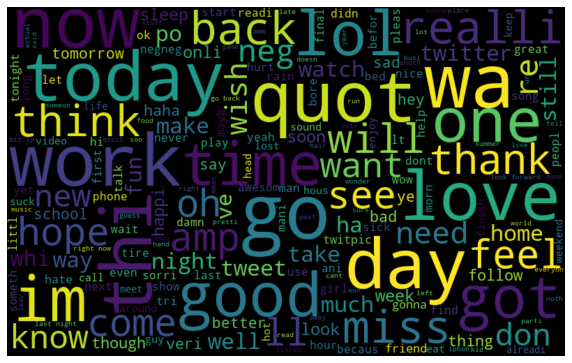

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height = 500,
                     random_state=21,
                     max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

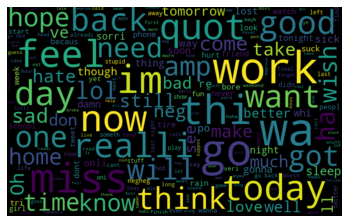

In [15]:
negative_words = ' '.join([text for text in data['tidy_text'][data['label']==0]])
neg_wordcloud = WordCloud(width=800,height=500,
                         random_state=21,
                         max_font_size=110).generate(negative_words)
plt.Figure(figsize=(10,7))
plt.imshow(neg_wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
#feature selection
#bag of word approach
bow_vectorizer = CountVectorizer(stop_words='english')
bow = bow_vectorizer.fit_transform(data['tidy_text'])
X_count_feat = pd.concat([data['body_len'],data['punct_per'],pd.DataFrame(bow.toarray())],axis=1)
X_count_feat.head()

body_len  punct_per  0  1  2  3  4  5  6  7  ...  3934  3935  3936  3937  \
0        92        1.1  0  0  0  0  0  0  0  0  ...     0     0     0     0   
1        66        4.5  0  0  0  0  0  0  0  0  ...     0     0     0     0   
2        81       27.2  0  0  0  0  0  0  0  0  ...     0     0     0     0   
3        96        1.0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
4        44       18.2  0  0  0  0  0  0  0  0  ...     0     0     0     0   

   3938  3939  3940  3941  3942  3943  
0     0     0     0     0     0     0  
1     0     0     0     0     0     0  
2     0     0     0     0     0     0  
3     0     0     0     0     0     0  
4     0     0     0     0     0     0  

[5 rows x 3946 columns]

In [18]:
#tfid approach
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(data['tidy_text'])
X_tfidf_feat = pd.concat([data['body_len'],data['punct_per'],pd.DataFrame(tfidf.toarray())],axis=1)
X_tfidf_feat.head()

body_len  punct_per    0    1    2    3    4    5    6    7  ...  3934  \
0        92        1.1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1        66        4.5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2        81       27.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3        96        1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4        44       18.2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

   3935  3936  3937  3938  3939  3940  3941  3942  3943  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3946 columns]

In [19]:
#model selection
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [20]:
#lets pick all the models
model = []
model.append(('LR',LogisticRegression()))
model.append(('RF',RandomForestClassifier()))
model.append(('GB',GradientBoostingClassifier()))
model.append(('DT',DecisionTreeClassifier()))
model.append(('NB',GaussianNB()))
model.append(('KNN',KNeighborsClassifier()))
model.append(('SVC',SVC()))

In [26]:
#10 fold crossvalidation for all the algorithm
#for count vectorizer
for mod,clf in model:
    score = cross_val_score(clf,X_count_feat,
                            data['label'])
    print(f"Model : {mod} with score : {score.mean()}")

Model : LR with score : 0.6689935812874342
Model : RF with score : 0.6404898151524838
Model : GB with score : 0.6474983229106167
Model : DT with score : 0.5975015495255376
Model : NB with score : 0.593510301906104
Model : KNN with score : 0.5185117651384519
Model : SVC with score : 0.4985045015030023


In [27]:
#10 fold crossvalidation for all the algorithm
#for tfidf vectorizer
for mod,clf in model:
    score = cross_val_score(clf,X_tfidf_feat,
                            data['label'])
    print(f"Model : {mod} with score : {score.mean()}")

Model : LR with score : 0.6719965842904374
Model : RF with score : 0.6394985690338014
Model : GB with score : 0.6499910705308007
Model : DT with score : 0.5934915425170297
Model : NB with score : 0.59399954677316
Model : KNN with score : 0.49950700325512915
Model : SVC with score : 0.4960057508783146


In [28]:
#since Logistic Regression seems to have better result
#we can hyperparameterize it
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(LogisticRegression(),param_grid,cv=10)
grid.fit(X_count_feat,data['label'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
grid.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
logistic_model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
scores = cross_val_score(logistic_model,X_count_feat,
                         data['label'],scoring='accuracy',cv=10)
print(f"Model LR with score : {scores.mean()}")

Model LR with score : 0.6899338483462086


In [31]:
#doing the same for tfidf
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}
grid = GridSearchCV(LogisticRegression(),param_grid,cv=10)
grid.fit(X_tfidf_feat,data['label'])

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
logistic_model_tfidf = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
score_tfidf = cross_val_score(logistic_model_tfidf,X_tfidf_feat,
                             data['label'],scoring='accuracy',cv=10)
print(f"Model LR with tfidf score : {score_tfidf.mean()}")

Model LR with tfidf score : 0.6794186729668242


In [37]:
#Now we understood that LR with count_vectorizer works great
X_train,X_test,y_train,y_test = train_test_split(X_count_feat,data['label'],test_size = 0.2,random_state=42)

In [41]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred = model.predict(X_test)

In [47]:
model.score(X_test,y_test)

0.6925

In [48]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [49]:
accuracy_score(pred,y_test)

0.6925

In [51]:
cm = confusion_matrix(y_test,pred)

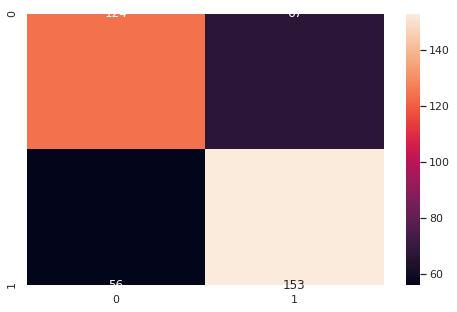

In [62]:
sns.set(rc={'figure.figsize':[8,5]},font_scale=1)
sns.heatmap(cm,annot=True,fmt='d')